Group Case Study

# **Lending Club Case Study**

### **Objective of this project**: Bank has to decide patterns from existing loan applicants

Two types of risks are associated with the bank’s decision:


1.   If the applicant is likely to **repay the loan**, then not approving the loan results in a l**oss of business to the company**
2.   If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company



### Loan applicants types:

1.   **Fully paid**: Applicant has fully paid the loan (the principal 
and the interest rate)
2.    **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
3.     **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan :

We will be using the EDA to understand how c**onsumer attributes** and **loan attributes** influence the tendency of default

In [108]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore') # This library will be used to ignore some warnings


In [37]:
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("plotly: ",plotly.__version__)


python:  3.7.13
numpy:  1.21.6
pandas:  1.3.5
matplotlib:  3.2.2
seaborn:  0.11.2
plotly:  5.5.0


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
#loan = pd.read_csv("/content/drive/MyDrive/ML/DataSets/loan.csv")
loan = pd.read_csv("loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
#df = pd.read_excel("/content/drive/MyDrive/ML/DataSets/Data_Dictionary.xlsx")
df = pd.read_excel("Data_Dictionary.xlsx")

## 1. Data Understanding

#### Lets verify  and handle the NA ( null, NaN etc) data, outliers

In [40]:
loan.shape

(39717, 111)

In [39]:
#There are some warning while importing the csv file, lets print first 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### **Observation**: NaN values, suffix text like months, % symbol 

In [41]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### **Observation**: number of na values matches with rows size. Which means full column is having null values. 

In [65]:
# Print all columns which are having na values
nan_cols = [i for i in loan.columns if loan[i].isnull().all()]
print(nan_cols)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [43]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## 2. Data Cleaning and Manipulation

In [83]:

# if a column has all na values, then that column does not give any value add. Those columns can be deleted
loan.dropna(axis=1,how='all',inplace=True)

In [46]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [84]:
loan.shape

(39717, 57)

In [49]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [48]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [54]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [85]:
#As our objective is to study the tendency of default, we can consider full paid & defaulted customers
loan_df =loan.loc[loan['loan_status']!='Current']

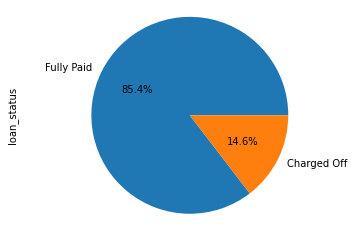

In [86]:
loan_df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')
plt.show()

### Observation: 14.6% of the cases 'Default'

In [91]:
loan_df =loan
loan_df['loan_status_new']=loan_df['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
loan_df['loan_status_new']=loan_df['loan_status_new'].apply(lambda x: int(x))
loan_df['interest_rate']=loan_df['int_rate'].apply(lambda x: float(x.strip('%')))

## 3.Data Analysis

Based on my research following visualisation can help to identify the defaulters


1.   Purpose
2.   Grade
3.   Duration
4.   Loan Amount
5.   Interest Rates
6.   Debt to Income Ratio




### 3.1 Loan Purpose

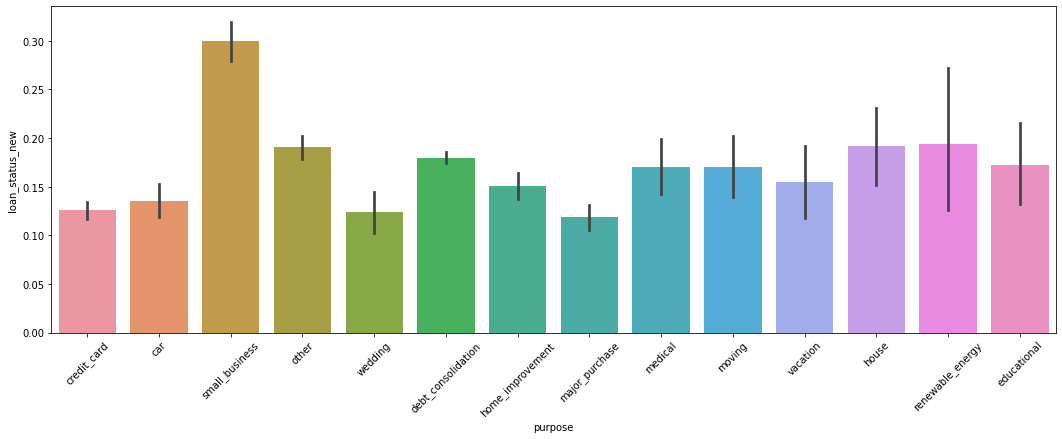

In [95]:
### Compare the loan against purpose
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.barplot(x='purpose',y='loan_status_new',data=loan_df)
plt.show()

### 3.2 Grade

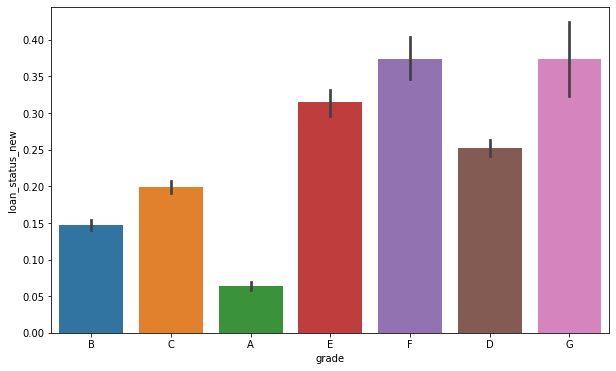

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade',y='loan_status_new',data=loan_df)
plt.show()

### 3.3 Duration


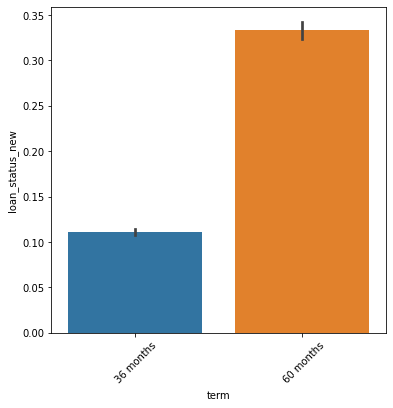

In [98]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=45)
sns.barplot(x='term',y='loan_status_new',data=loan_df)
plt.show()

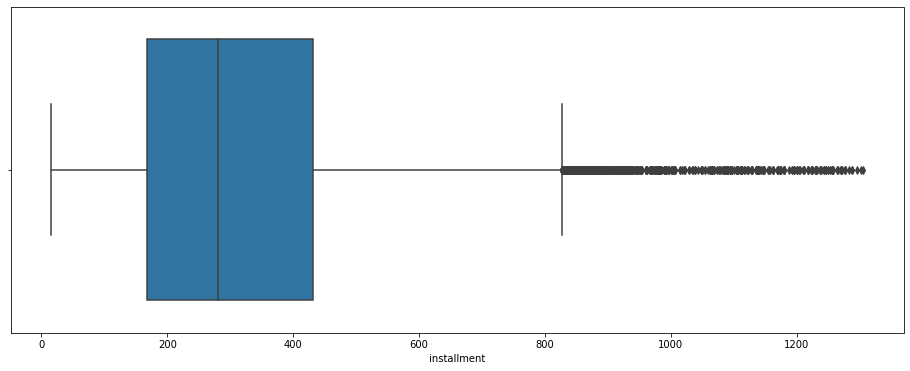

In [116]:
plt.figure(figsize=(16,6))
sns.boxplot(loan_df.installment)
plt.show()

### 3.4 Loan Amount


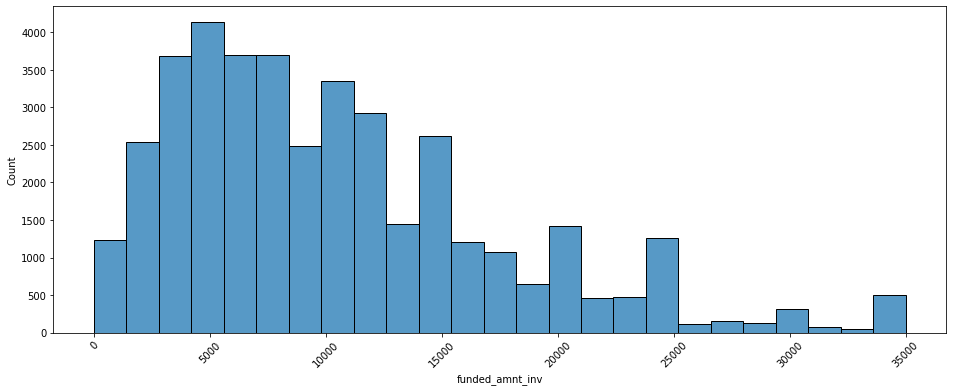

In [103]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.histplot(x='funded_amnt_inv',bins=25,data=loan_df)
plt.show()

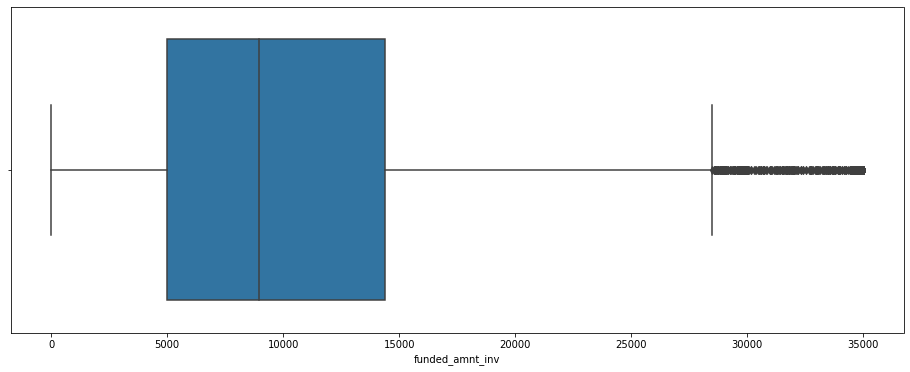

In [110]:
plt.figure(figsize=(16,6))
sns.boxplot(loan_df.funded_amnt_inv)
plt.show()

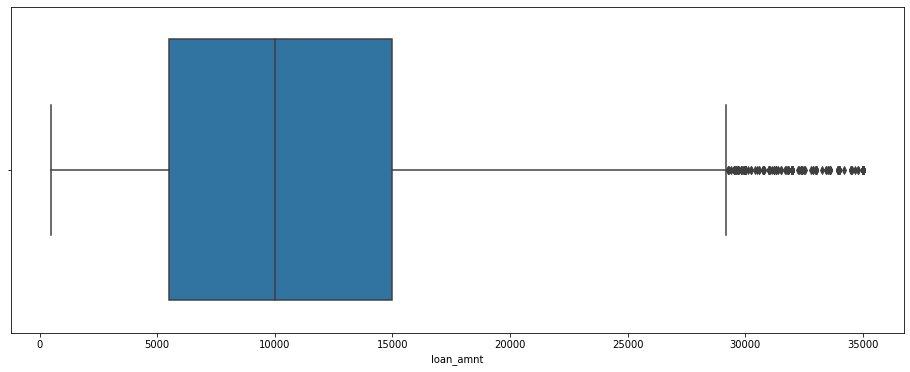

In [109]:
plt.figure(figsize=(16,6))
sns.boxplot(loan_df.loan_amnt)
plt.show()

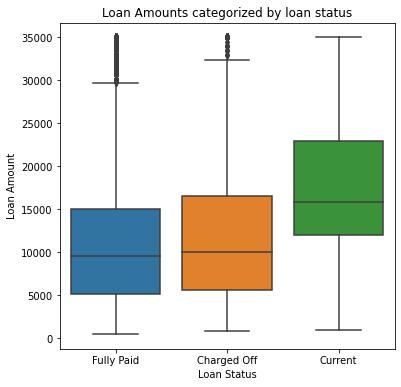

In [133]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="loan_amnt", data=loan_df)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amounts categorized by loan status")
plt.show()

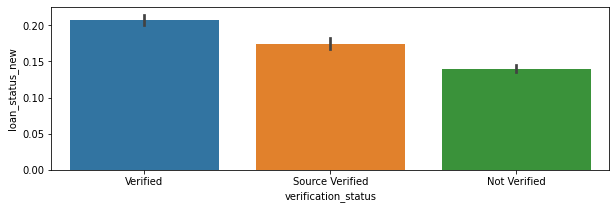

In [120]:
plt.figure(figsize=(10, 3))
sns.barplot(x='verification_status', y='loan_status_new', data=loan_df)
plt.show()

### 3.5 Interest Rates


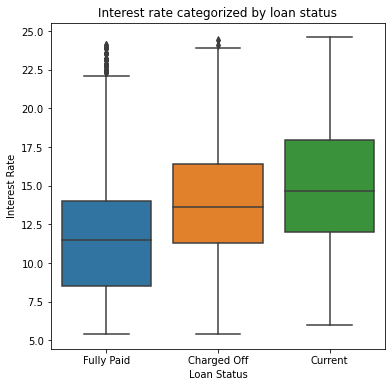

In [132]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="interest_rate", data=loan_df)
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.title("Interest rate categorized by loan status")
plt.show()


### 3.6 Debt to Income Ratio

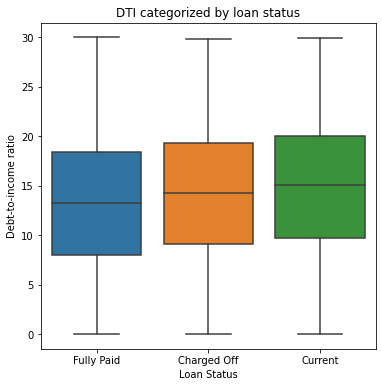

In [134]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="loan_status", y="dti", data=loan_df)
plt.xlabel("Loan Status")
plt.ylabel("Debt-to-Income ratio")
plt.title("Debt to Income Vs loan status")
plt.show()

### Correlation

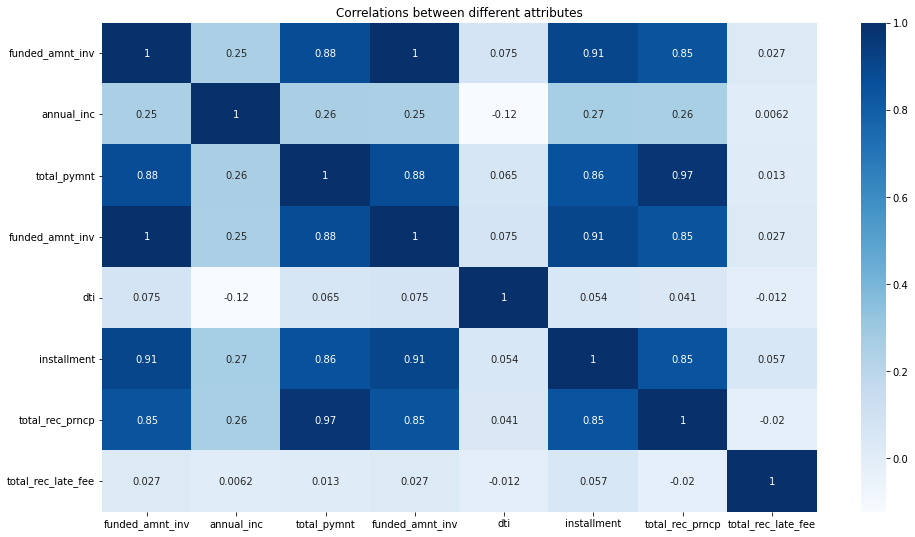

In [140]:
### Correlation 
plt.figure(figsize=(16,9))
#show heatmap
sns.heatmap(loan_df[['funded_amnt_inv','annual_inc', 'total_pymnt', 'funded_amnt_inv',
                  'int_rate', 'dti',
                'installment','total_rec_prncp', 'total_rec_late_fee']].corr(),cmap='Blues', annot=True)
title='Correlations between different factors'
plt.title(title)
plt.show()

## 4. Conclusion

There is a strong correlation of funded_amnt_inv and total_pyment. Means investors are giving more amount which helps to repayments

1.   Loan purpose is not impacting the default
2.   60 months tenure are resulting default
3.   Annual Income and house ownership are not impacting the defaulting.

